In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('bike/train.csv') 
test = pd.read_csv('bike/test.csv')

In [3]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [4]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


- id: 고유 id
- hour: 시간
- temperature: 기온
- precipitation: 비가 오지 않았으면 0, 비가 오면 1
- windspeed: 풍속(평균)
- humidity: 습도
- visibility: 특정 기상 상태에 따른 가시성
- ozone: 오존
- pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count: 시간에 따른 따릉이 대여 수

## 데이터 형상 확인

In [6]:
train.shape

(1459, 11)

In [7]:
test.shape

(715, 10)

## 데이터 타입 확인

In [19]:
train.dtypes

id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
count                     float64
dtype: object

In [17]:
test.dtypes

id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
dtype: object

## unique 데이터

In [78]:
train['hour'].unique()

array([20, 13,  6, 23, 18,  2,  3, 21,  9, 14,  4, 10,  1, 17,  8, 16,  0,
        7, 15, 19, 22, 11,  5, 12])

## 요약 정보 확인

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


## 결측치

In [13]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [22]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [23]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [24]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

* 확인

In [81]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [82]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

 ## histogram

<AxesSubplot:>

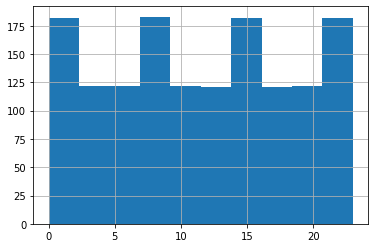

In [26]:
train['hour'].hist()

<AxesSubplot:>

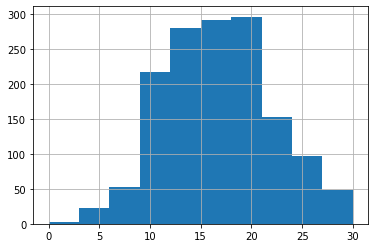

In [28]:
train['hour_bef_temperature'].hist()

<AxesSubplot:>

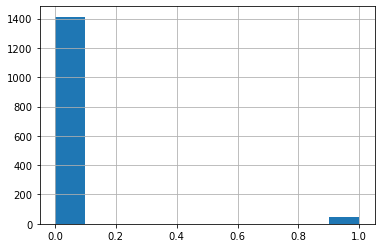

In [29]:
train['hour_bef_precipitation'].hist()

<AxesSubplot:>

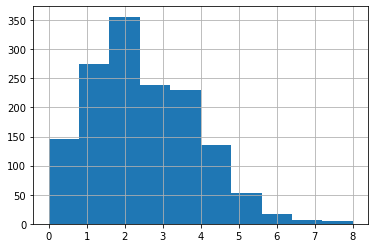

In [30]:
train['hour_bef_windspeed'].hist()

<AxesSubplot:>

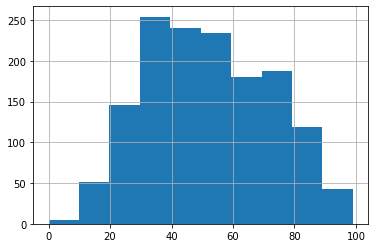

In [31]:
train['hour_bef_humidity'].hist()

<AxesSubplot:>

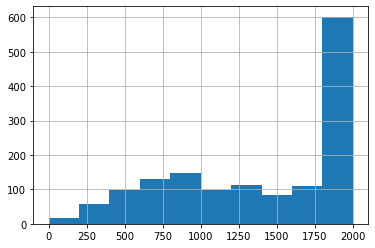

In [32]:
train['hour_bef_visibility'].hist()

<AxesSubplot:>

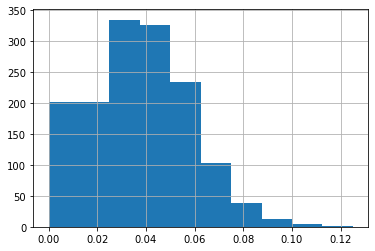

In [33]:
train['hour_bef_ozone'].hist()

<AxesSubplot:>

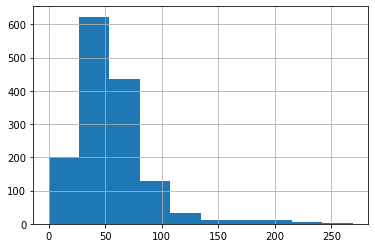

In [34]:
train['hour_bef_pm10'].hist()

<AxesSubplot:>

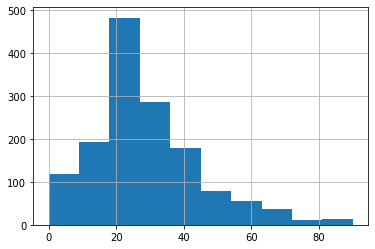

In [35]:
train['hour_bef_pm2.5'].hist()

<AxesSubplot:>

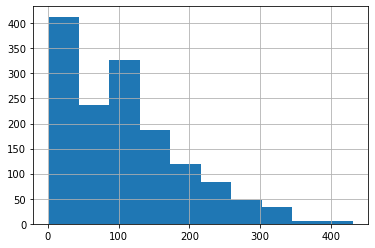

In [36]:
train['count'].hist()

## 산점도

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

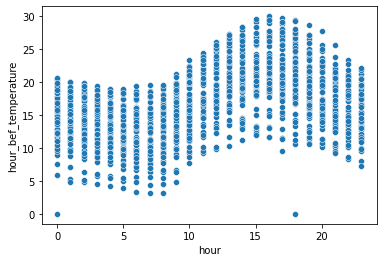

In [80]:
sns.scatterplot(data=train, x='hour',y ='hour_bef_temperature')

## piechart

<AxesSubplot:ylabel='count'>

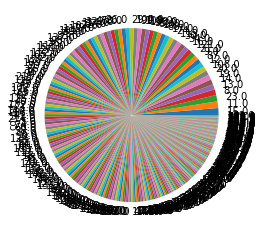

In [71]:
count= train['count'].value_counts()

count.plot(kind='pie')

array([<AxesSubplot:ylabel='hour'>], dtype=object)

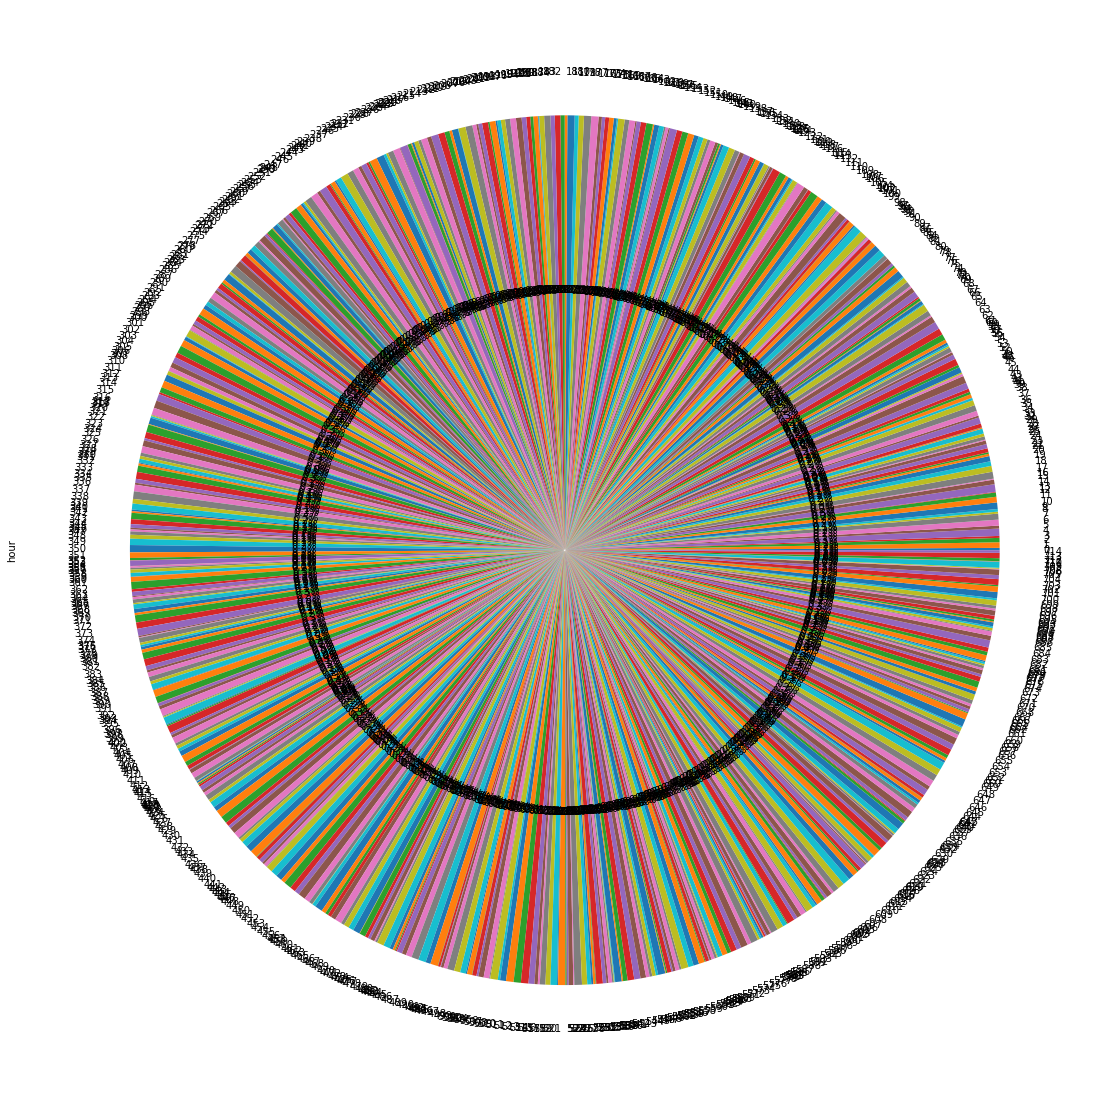

In [66]:
test['hour'].plot(kind='pie', autopct = "%.1f%%", subplots=True, figsize=(30,20))

## box plot

<AxesSubplot:>

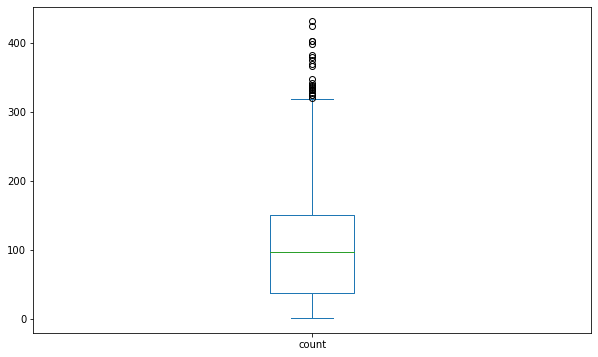

In [50]:
train['count'].plot(kind='box', figsize=(10,6))

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

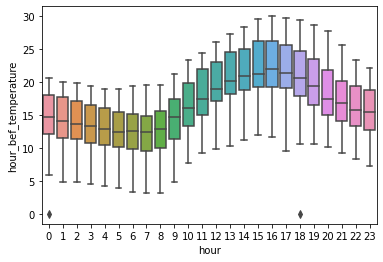

In [67]:
sns.boxplot(data=train, x = 'hour', y='hour_bef_temperature')

## 커널밀도추정 함수

<AxesSubplot:xlabel='hour', ylabel='Density'>

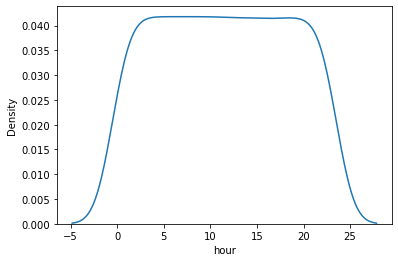

In [79]:
sns.kdeplot(data=train, x='hour')

## 막대 그래프(barplot)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

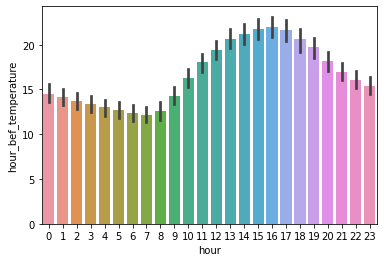

In [63]:
sns.barplot(data=train, x='hour', y='hour_bef_temperature')

## 포인트 플롯(pointplot)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

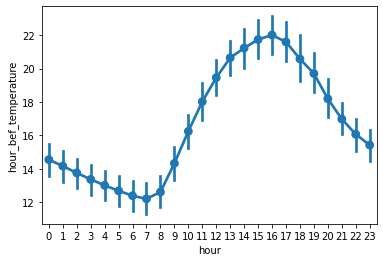

In [64]:
sns.pointplot(data=train, x='hour', y='hour_bef_temperature')

## violinplot

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

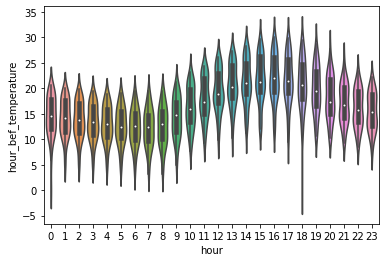

In [84]:
sns.violinplot(data=train, x='hour', y='hour_bef_temperature', figsize=(10,6))

## 상관관계

In [51]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.002651,-0.056401,-0.001710,-0.019976,0.006926,0.058597,-0.022063,-0.012050,-0.002131
hour,-0.010901,1.000000,0.405553,0.021708,0.462188,-0.326464,0.176760,0.450612,0.062749,0.055543,0.626047
hour_bef_temperature,-0.002651,0.405553,1.000000,-0.095598,0.376715,-0.479358,0.205710,0.510923,0.019943,0.000521,0.619277
hour_bef_precipitation,-0.056401,0.021708,-0.095598,1.000000,0.024509,0.275869,-0.215696,-0.059354,-0.058610,-0.013009,-0.163580
hour_bef_windspeed,-0.001710,0.462188,0.376715,0.024509,1.000000,-0.417761,0.248713,0.491084,0.021566,-0.135292,0.458547
hour_bef_humidity,-0.019976,-0.326464,-0.479358,0.275869,-0.417761,1.000000,-0.578853,-0.392145,-0.101618,0.092388,-0.464890
hour_bef_visibility,0.006926,0.176760,0.205710,-0.215696,0.248713,-0.578853,1.000000,0.097932,-0.339860,-0.485773,0.301195
hour_bef_ozone,0.058597,0.450612,0.510923,-0.059354,0.491084,-0.392145,0.097932,1.000000,0.217722,0.168936,0.479579
hour_bef_pm10,-0.022063,0.062749,0.019943,-0.058610,0.021566,-0.101618,-0.339860,0.217722,1.000000,0.558211,-0.066773
hour_bef_pm2.5,-0.012050,0.055543,0.000521,-0.013009,-0.135292,0.092388,-0.485773,0.168936,0.558211,1.000000,-0.057918


## heatmap

<AxesSubplot:>

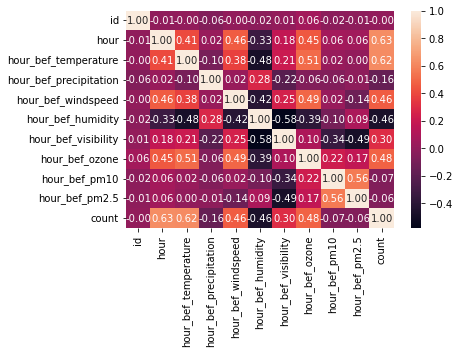

In [59]:
sns.heatmap(train.corr(), fmt= '.2f', annot=True)